## Importing packages

In [ ]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','preprocessing_clustering.R'))
# install_all_packages()
load_library_packages()

## Clustering - Rock Calisnki

In [3]:
df_during_facilitators_dist <- distinct(df_during_facilitators)
nrow(df_during_facilitators_dist)

[1] 50

### Calinski
<hr />

In [4]:
df_matrix <- data.matrix(df_during_facilitators_dist) - 1
similarity_matrix <- df_matrix %*% t(df_matrix) + ((!df_matrix) + 0) %*% ((!t(df_matrix)) + 0)
dissimilarity_matrix <- ncol(df_during_facilitators_dist) - similarity_matrix
head(dissimilarity_matrix)

0,2,1,2,4,1,2,1,3,2,...,2,3,3,3,3,4,5,4,1,2
2,0,3,2,4,3,2,1,1,2,...,4,3,3,3,3,4,5,2,3,4
1,3,0,3,3,2,3,2,4,1,...,3,2,2,2,4,5,4,3,2,1
2,2,3,0,2,3,2,1,3,2,...,2,5,3,3,5,2,3,4,3,4
4,4,3,2,0,3,2,3,3,2,...,2,5,3,3,5,2,1,4,5,4
1,3,2,3,3,0,1,2,2,3,...,1,4,4,4,2,3,4,5,2,3


#### Scanning parameters


In [5]:
source(here('Modules','modules.R'))
dists <- c("cosine", "jaccard", "hamman", "simple matching", "faith")
thetas <- linspace(0, 0.99, 15)
nt <- length(thetas)
nd <- length(dists)
nk <- nrow(distinct(df_during_facilitators))
# calins <- c()
# for (t in thetas) {
#     for (d in dists){
#         for (k in 2:nk) {
#             cal <- calisnki_values_rock(
#                 num_clusters = k,
#                 theta = t,
#                 df = df_during_facilitators_dist,
#                 distmethod = d)[[1]]
#             calins <- append(calins, cal)
#         }
#     }
# }


In [5]:
# ks_by_theta <- data.frame(
#     theta=rep(thetas, each=((nk-1)*nd)), 
#     dist=rep(rep(dists, each=(nk-1)), nt), 
#     k=rep(2:nk, nd*nt), calins=calins
# )

# write.csv(
#     ks_by_theta,
#     "calisnki_rock_facilitators.csv", row.names = FALSE
# )

####  Best Situations

In [6]:
calins <- read.csv("calisnki_rock_facilitators.csv")
calins <- calins[complete.cases(calins), ]
calins %>% group_by(dist) %>% slice(which.max(calins))

theta,dist,k,calins
<dbl>,<chr>,<int>,<dbl>
0.2828571,cosine,8,4032.0000
0.2828571,faith,7,2744.8333
0.0000000,hamman,13,851.0000
0.2828571,jaccard,6,3493.6000
0.2828571,simple matching,12,994.9091


In [7]:
best_situtation <- calins[calins['calins'] == max(calins['calins']), ]
best_situtation

,theta,dist,k,calins
,<dbl>,<chr>,<int>,<dbl>
987,0.2828571,cosine,8,4032


In [8]:
best_theta_rock <- best_situtation[1, 'theta']
best_dist_rock <- best_situtation[1, 'dist']
best_K_rock <- best_situtation[1, 'k']
calisnki <- best_situtation[1, 'calins']

print("Best K")
print(best_K_rock)
print("Best Theta")
print(best_theta_rock)
print('Best dist')
print(best_dist_rock)
print("Calisnki")
print(calisnki)

[1] "Best K"
[1] 8
[1] "Best Theta"
[1] 0.2828571
[1] "Best dist"
[1] "cosine"
[1] "Calisnki"
[1] 4032


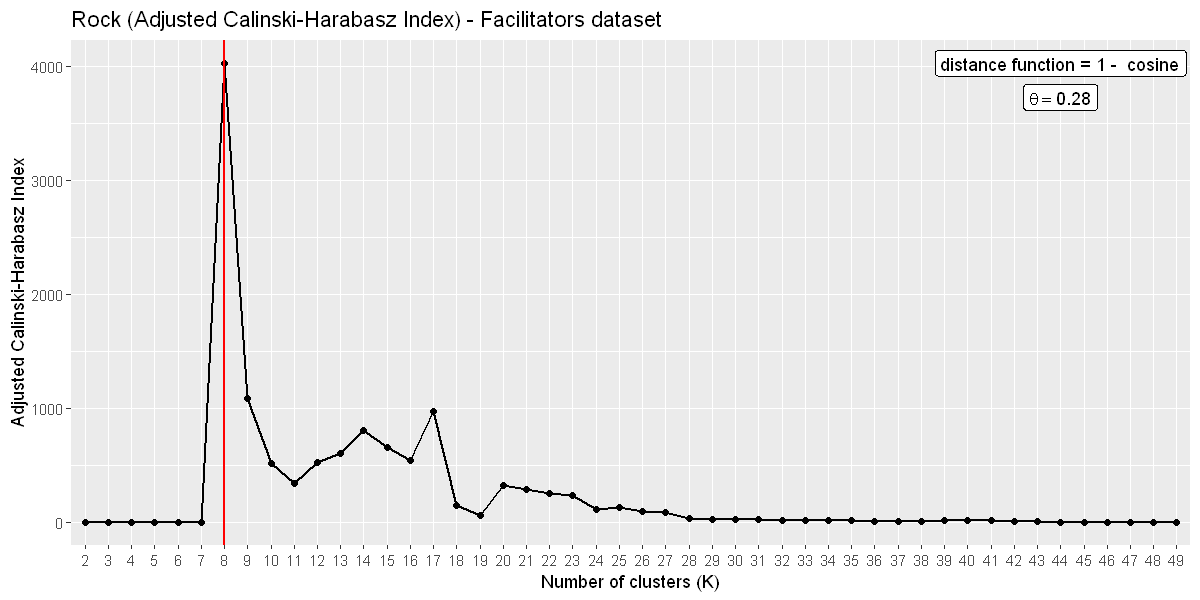

In [12]:
label1 = paste("theta == ", round(best_theta_rock, 2))
label2 =paste('distance function = 1 - ', best_dist_rock)
options(repr.plot.width = 10, repr.plot.height =5)
ggplot(data=calins[(calins$dist == best_dist_rock) & (calins$theta == best_theta_rock), ], aes(x=factor(k), y=calins, group=1)) +
    geom_line(size=0.7) + geom_point(size=1.5) + 
    geom_vline(xintercept = best_K_rock-1, color = "red", size=0.8) + 
    ggtitle("Rock (Adjusted Calinski-Harabasz Index) - Facilitators dataset") +
    xlab('Number of clusters (K)') +
    ylab('Adjusted Calinski-Harabasz Index') +
    annotate("label", x = 43, y = calisnki-300, parse = TRUE, label=label1) +
    annotate("label", x = 43, y = calisnki, label=label2) 


ggsave(path="graphs", file="metric_evolution.jpeg", width = 10, height = 5)

#### Evaluating the silhuette coefficient for best seed

In [9]:
# silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=68)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() + 
#   theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

In [10]:
# silhoutte_result <-  silhouette_values(num_clusters=4, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=62)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() 

In [11]:
# silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=13)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() 

## Exploring Kmodes best k

In [12]:
df_during_facilitators_dist$cluster <-rockCluster(df_matrix, n=best_K_rock, theta=best_theta_rock, fun = "dist", funArgs = list(method=best_dist_rock))$cl
head(df_during_facilitators_dist)

Clustering:
computing distances ...
computing links ...
computing clusters ...


PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_music,PA_easiness_others,PA_facilitator_home,PA_facilitator_group,cluster
1,0,0,0,1,0,1
0,0,0,0,0,0,2
1,1,0,0,1,0,1
0,0,0,0,1,1,1
0,1,1,0,1,1,1
1,0,1,0,1,0,1


In [13]:
joint <- c(
    'PA_easiness_outdoor_activities'='PA_easiness_outdoor_activities',
    'PA_easiness_professional_guidance' = 'PA_easiness_professional_guidance',
    'PA_easiness_music' = 'PA_easiness_music',
    'PA_easiness_others' = 'PA_easiness_others',
    'PA_facilitator_home' = 'PA_facilitator_home',
    'PA_facilitator_group' = 'PA_facilitator_group'
)

df_during_facilitators <- left_join(df_during_facilitators, df_during_facilitators_dist, by = joint)
df_during$cluster <- df_during_facilitators$cluster
df_during_barriers$cluster <- df_during_facilitators$cluster

nrow(df_during_facilitators)

[1] 1214

In [14]:
table(df_during$cluster)


  1   2   3   4   5   6   7   8 
798   8 214  20  46  62  24  42 

### Profile Plots
<hr />

In [15]:
colors <- c("pink1", "violet", "mediumpurple1", "slateblue1", "purple", "purple3",
        "turquoise2", "skyblue", "steelblue", "blue2", "navyblue",
        "orange", "tomato", "coral2", "palevioletred", "violetred", "red2",
        "springgreen2", "yellowgreen", "palegreen4",
        "wheat2", "tan", "tan2", "tan3", "brown",
        "grey70", "grey50", "grey30")

In [ ]:
create_cluster_histograms(
    colors = colors, 
    df = df_during, 
    names = names(df_during[, 20:ncol(df_during)-1]),
    best_k = best_K_rock
)
create_cluster_histograms(
    colors = colors, 
    df = df_during_barriers, 
    names = names(df_during_barriers[, 1:ncol(df_during_barriers)-1]),
    best_k = best_K_rock
)

#### Mode

In [ ]:
modes <- data.frame(matrix(ncol = ncol(df_during_facilitators_dist)-1, nrow = 0))
colnames(modes) <- colnames(df_during_facilitators_dist)[1:ncol(df_during_facilitators_dist)-1]
for( cl in unique(df_during_facilitators_dist$cluster)){
    cl_mode <- unname(apply(df_during_facilitators_dist[df_during_facilitators_dist$cluster == cl, ], 2, modefunc))
    modes[nrow(modes) + 1,] <- cl_mode[1:length(cl_mode)-1]
}

modes

,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_music,PA_easiness_others,PA_facilitator_home,PA_facilitator_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,0,0,0
2,0,0,0,0,1,1
3,0,0,0,0,1,0
4,0,0,1,0,1,1
5,1,0,0,0,1,1
6,0,0,0,0,0,1
7,0,1,0,0,1,1
8,0,0,0,1,1,1
